In [1]:
# Importing necessary libraries and modules
import os
import datetime
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load data
countries = pd.read_csv("./data/village_savings/Countries.csv")
locations = pd.read_csv("./data/village_savings/Locations.csv")
regions = pd.read_csv("./data/village_savings/Regions.csv")
members = pd.read_csv("./data/village_savings/Members.csv") #tab seperated csv
group_members = pd.read_csv("./data/village_savings/GroupMembers.csv")
groups = pd.read_csv("./data/village_savings/SavingsGroups.csv")


In [3]:
# Join data: Location Name, Region Name, and Country Name
groups = groups.merge(locations, on="LocationId").merge(regions, on="RegionId").merge(countries, on="CountryCode")

In [4]:
# Get Member of groups
# groups[groups.GroupStatusCode != 'E']
groups['NumberOfMembers'] = 0
for idx, row in groups.iterrows():
   if row.IsKhusaServiceOffered == 1:
       groups.at[idx, 'NumberOfMembers'] = group_members[lambda x: x.GroupID == row.GroupID]['GroupID'].count()

In [5]:
# Create pivot table using RegionName and CountryName columns.
group_pivot_table = pd.pivot_table(groups[groups.NumberOfMembers > 0], values='NumberOfMembers', index=['RegionName'], columns=['GroupName'], fill_value=0)

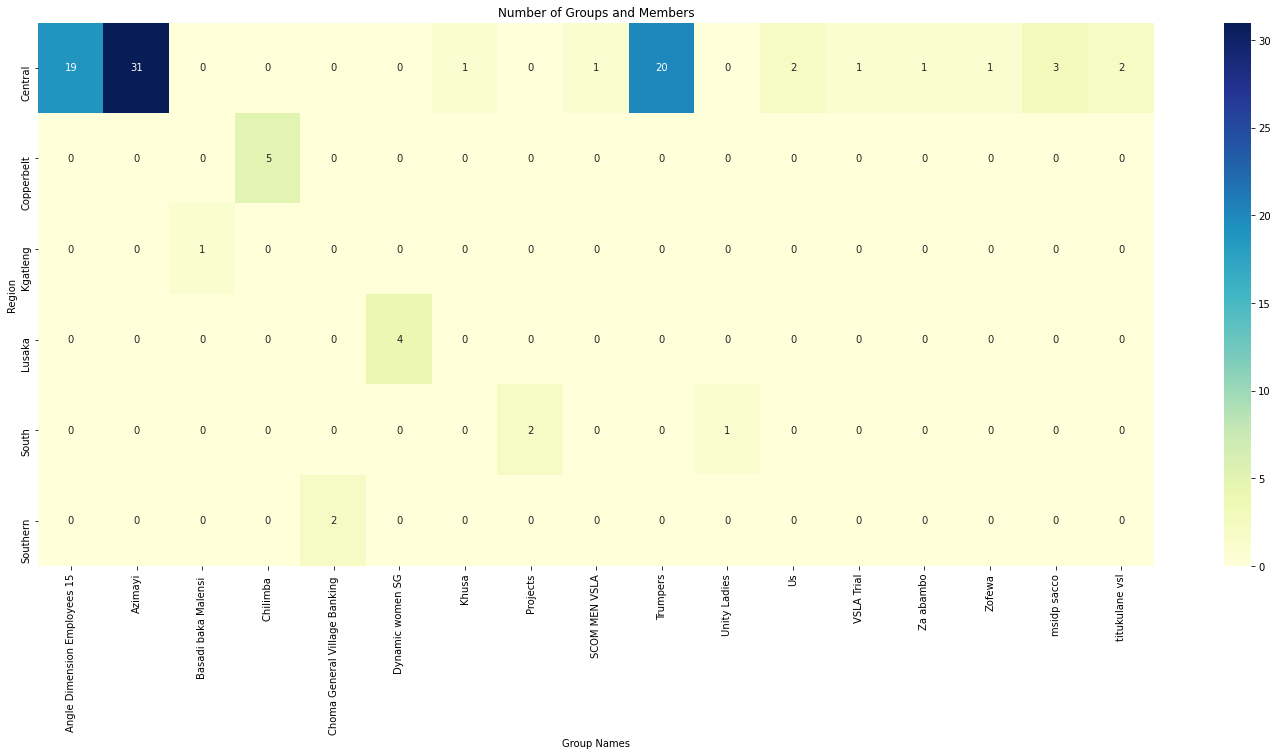

In [12]:
#Question 1. How many groups and members are there currently registered? And what is their geographical coverage? (Country and Region)
fig,ax = plt.subplots(figsize=(25, 10))
sns.heatmap(group_pivot_table, annot=True,ax=ax,cmap="YlGnBu", )
plt.ylabel('Region')
plt.xlabel('Group Names')
plt.title("Number of Groups and Members")
plt.show()

<AxesSubplot:xlabel='LocationName'>

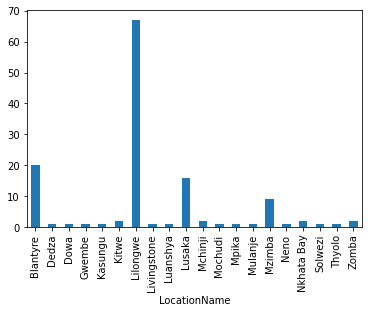

In [6]:
groups.groupby([groups.LocationName]).GroupID.count().plot.bar()

In [7]:
group_members = group_members.merge(members[['MemberID', 'Gender', 'DateOfBirth']], on="MemberID", how='left').merge(groups[['GroupID', 'GroupName', 'RegionName', 'LocationName']], on="GroupID" , how="right")

<AxesSubplot:xlabel='GroupName'>

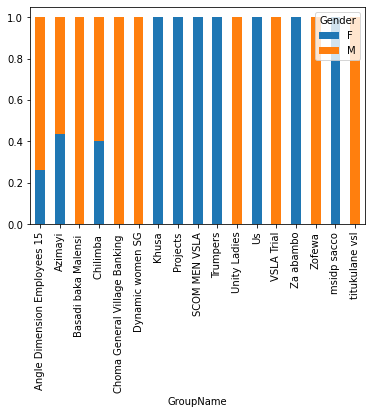

In [15]:
# pd.crosstab([group_members.GroupName],group_members.Gender).plot.bar()
group_members.dropna(subset=['Gender']).groupby(group_members.GroupName).Gender.value_counts(normalize=True).unstack().plot.bar(stacked=True)

<AxesSubplot:xlabel='RegionName'>

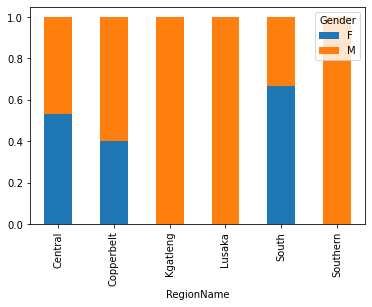

In [8]:
group_members.dropna(subset=['Gender']).groupby([group_members.RegionName]).Gender.value_counts(normalize=True).unstack().plot.bar(stacked=True)


[['Dowa', 1.0], ['Mchinji', 1.0], ['Kasungu', 1.0], ['Dedza', 1.0], ['Zomba', 1.0], ['Mulanje', 1.0], ['Thyolo', 1.0], ['Neno', 1.0], ['Mzimba', 1.0], ['Nkhata Bay', 1.0], ['Luanshya', 1.0], ['Gwembe', 1.0], ['Livingstone', 1.0], ['Lusaka', 1.0], ['Solwezi', 1.0], ['Mpika', 1.0], ['Mochudi', 1.0]]


Text(0, 0.5, 'Bias')

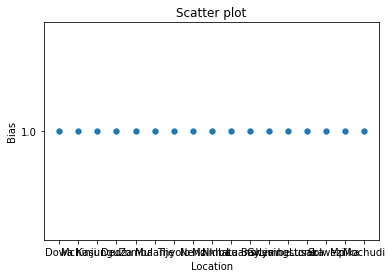

In [24]:
threshold = 0.4
location_names =  group_members.LocationName.unique()
gender_by_locations = group_members.groupby(group_members.LocationName).Gender.value_counts(normalize=True)
biased_locs=[]
for location in location_names:
    try:
        bias = abs(gender_by_locations.loc[location, 'F'] - gender_by_locations.loc[location, 'M'])
        if bias > threshold:
            biased_locs.append([location, round(bias, 2)])
    except KeyError:
        biased_locs.append([location, 1.0])
print(biased_locs)
biased_locs =  np.array(biased_locs)
plt.scatter(biased_locs[:, 0], biased_locs[:, 1], s=np.pi*9, vmin=0.0, vmax=1.0)
plt.title('Scatter plot')
plt.xlabel('Location')
plt.ylabel('Bias')

In [16]:
group_members.DateOfBirth = pd.to_datetime(group_members.DateOfBirth, format="%d-%m-%Y")
group_members['Age'] = datetime.datetime.now().year - group_members.DateOfBirth.dt.year
# group_members.fillna({'Age': 0}, inplace=True)
group_members

,MemberGroupID,MemberID,GroupID,IsMainMember,MemberStatusCode,DateCreated,Gender,DateOfBirth,GroupName,RegionName,LocationName,Age
0,1.0,1.0,1,1.0,A,24-09-18 15:20:10,M,1960-08-16,Angle Dimension Employees 15,Central,Lilongwe,61.0
1,2.0,2.0,1,1.0,A,24-09-18 16:04:23,M,1979-10-26,Angle Dimension Employees 15,Central,Lilongwe,42.0
2,3.0,3.0,1,1.0,A,24-09-18 16:06:17,M,1987-10-22,Angle Dimension Employees 15,Central,Lilongwe,34.0
3,4.0,4.0,1,1.0,A,24-09-18 16:08:07,M,1965-09-09,Angle Dimension Employees 15,Central,Lilongwe,56.0
4,5.0,5.0,1,1.0,A,24-09-18 16:10:24,M,1986-11-21,Angle Dimension Employees 15,Central,Lilongwe,35.0
...,...,...,...,...,...,...,...,...,...,...,...,...
237,NaN,NaN,124,NaN,NaN,NaN,NaN,NaT,Evergreen,Lusaka,Lusaka,NaN
238,NaN,NaN,126,NaN,NaN,NaN,NaN,NaT,Power Save,Lusaka,Lusaka,NaN
239,NaN,NaN,56,NaN,NaN,NaN,NaN,NaT,Lunga Agro Cooperative Society Ltd,North-Western,Solwezi,NaN
240,NaN,NaN,88,NaN,NaN,NaN,NaN,NaT,Chitulika YLA,Muchinga,Mpika,NaN


In [23]:
group_members[group_members.Age > 0].groupby([group_members.GroupName]).Age.agg(['min', 'max', 'mean']).reset_index()


,GroupName,min,max,mean
0,Angle Dimension Employees 15,4.0,61.0,34.894737
1,Azimayi,2.0,31.0,4.080645
2,Basadi baka Malensi,34.0,34.0,34.000000
3,Chilimba,26.0,61.0,36.600000
4,Choma General Village Banking,37.0,39.0,38.000000
5,Dynamic women SG,38.0,50.0,46.250000
6,Khusa,34.0,34.0,34.000000
7,Projects,30.0,30.0,30.000000
8,SCOM MEN VSLA,35.0,35.0,35.000000
9,Trumpers,23.0,40.0,32.500000


In [24]:
group_members[group_members.Age > 0].groupby([group_members.RegionName]).Age.agg(['min', 'max', 'mean']).reset_index()


,RegionName,min,max,mean
0,Central,2.0,61.0,16.486726
1,Copperbelt,26.0,61.0,36.600000
2,Kgatleng,34.0,34.0,34.000000
3,Lusaka,38.0,50.0,46.250000
4,South,30.0,30.0,30.000000
5,Southern,37.0,39.0,38.000000


<ipython-input-18-a931459a19d8>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  groups[groups.CountryName == 'Malawi'][groups.LocationName.isin(major_cities)].groupby(['LocationName']).NumberOfMembers.sum().plot.pie()


<AxesSubplot:ylabel='NumberOfMembers'>

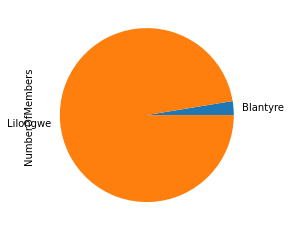

In [18]:
major_cities = ['Lilongwe', 'Zomba', 'Mzuzu', 'Blantyre'] #major cities in Malawi
groups[groups.CountryName == 'Malawi'][groups.LocationName.isin(major_cities)].groupby(['LocationName']).NumberOfMembers.sum().plot.pie()

In [ ]:
# group_members.groupby([group_members.DateCreated.dt.year]).MemberID.count().max().sort_by()
groups.head()
# group_members.groupby([group_members.DateCreated.dt.month, group_members.DateCreated.dt.year]).MemberID.max()



In [ ]:
group_members.head()

In [ ]:
group_members.DateCreated = group_members.DateCreated.apply(lambda x: to_datetime(x, "%y-%m-%d %H:%M:%S")) #convert column to to_datetime